In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup, run_box_NObreakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
NUMBA_DISABLE_JIT = 1

from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, ExponFrag, AlwaysN
from PySDM.physics.constants import si
import PySDM.physics.constants as const
from PySDM.physics.trivia import Trivia

In [ ]:
# DEBUGGING
settings = Settings()
settings.warn_overflows = False
t_steps = np.linspace(0,100,11,dtype="int")

Ec = 0.9
settings.coal_eff = ConstEc(Ec = Ec)
#settings.coal_eff = Berry1967()
settings.n_sd = 2**8
mu = Trivia.volume(const, 100 * si.um)
vmin = mu/10
nfmax = 4
settings.fragmentation = Gaussian(mu = mu, sigma = mu / 4, vmin=vmin, nfmax=nfmax)
#settings.fragmentation = Gaussian(mu = mu, sigma = mu / 4)
#settings.fragmentation = ExponFrag(scale = mu)
(x,y,rates) = run_box_breakup(settings, t_steps)
print(rates)
for (j, step) in enumerate(t_steps):
        lbl = 'Ec = ' + str(Ec)
        pyplot.step(x,y[j]*settings.rho)
pyplot.xscale("log")

## Sensitivity to Ec (coalescence efficiency)

finished Ec=1.0
[[     0.        0.        0.        0.  ]
 [999075.51      0.   999075.51      0.  ]]
finished Ec=0.98
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.09523919e+12 0.00000000e+00 2.07939896e+12 1.81422006e+12]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.86601038e+14 0.00000000e+00 4.61962946e+14 2.14125535e+14]]
finished Ec=0.9
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.85986908e+14 0.00000000e+00 5.29209965e+14 2.60969270e+14]]
finished Berry
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06315656e+14 4.91000000e+00 1.08276338e+06 1.92964070e+14]]


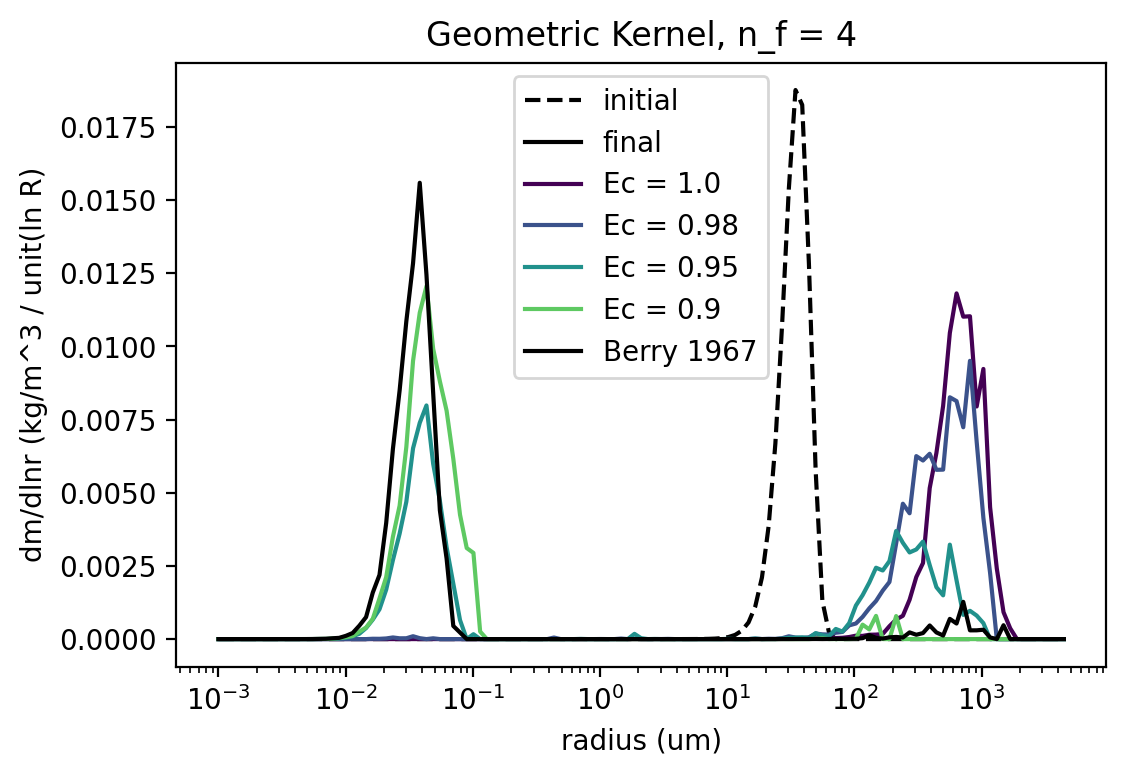

In [15]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
import numpy as np

settings = Settings()

settings.fragmentation = AlwaysN(n=4)
settings.n_sd = 2**12

settings.warn_overflows = False
t_steps = [0, 100]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.98, 0.95, 0.9]

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.plot(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
pyplot.plot(x[0],y[0,0]*settings.rho, color='k', label='final')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        pyplot.plot(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    pyplot.plot(x,y[j]*settings.rho, color='k', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
#pyplot.annotate('t=0s',(10.0, 0.0175))
#pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
#pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Geometric Kernel, n_f = 4")

pyplot.savefig('Ec_sensitivity.png')

## Sensitivity to n_f

finished nf=1
[[     0.        0.        0.        0.  ]
 [999001.95      0.   948295.09  50706.86]]
finished nf=2
[[      0.         0.         0.         0.  ]
 [1051026.33       0.    997956.61   53344.95]]
finished nf=4
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.39849763e+13 0.00000000e+00 8.90094466e+13 5.35873184e+13]]
finished nf=6
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.79288333e+14 0.00000000e+00 4.54449105e+14 8.88474447e+13]]


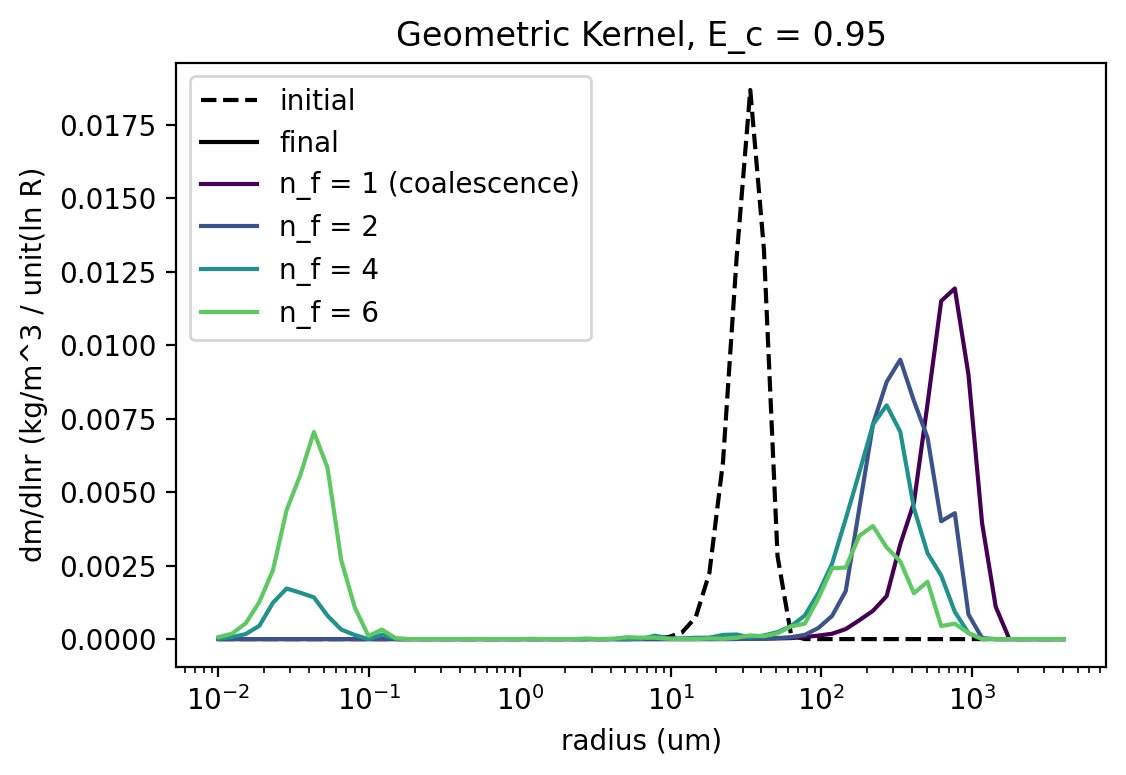

In [6]:
settings = Settings()

settings.coal_eff = ConstEc(Ec=0.95)
settings.n_sd = 2**12

settings.warn_overflows = False
t_steps = [0, 100]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

nf_vals = [1, 2, 4, 6]

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.plot(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
pyplot.plot(x[0],y[0,0]*settings.rho, color='k', label='final')

for (i, nf) in enumerate(nf_vals):
    settings.fragmentation = AlwaysN(n=nf)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished nf="+str(nf))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'n_f = ' + str(nf)
        if nf == 1:
            lbl += ' (coalescence)'
        pyplot.plot(x,y[j]*settings.rho, color=cmap(i/len(nf_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
#pyplot.annotate('t=0s',(10.0, 0.0175))
#pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
#pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Geometric Kernel, E_c = 0.95")

pyplot.savefig('nf_sensitivity.png')

## Sensitivity to n_f

In [ ]:
from PySDM.physics.constants import si

settings = Settings()
t_steps = [0, 100]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

nf_vals = [3, 4, 5]
Ec = 0.95

pyplot.figure(figsize=(6,4),dpi=200)
for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = ExponFrag(scale=mu * si.micrometres)
    print(settings.fragmentation.scale)
    (x,y) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        lbl = 'mu = ' + str(mu) + 'um'
        pyplot.plot(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.annotate('t=0s',(10.0, 0.0175))
pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Geometric Kernel with Berry 1967 Efficiency, Exponential Fragmentation")
pyplot.savefig('exp_mu_sensitivity.png')


In [ ]:
from PySDM.dynamics.collisions.breakup_fragmentations import ExponFrag, Gaussian
from PySDM.physics.constants import si

settings = Settings()
t_steps = [0, 60, 240]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

mu_vals = [10, 100]

pyplot.figure(figsize=(6,4),dpi=200)
for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = Gaussian(mu = mu * si.micrometres, scale= mu / 2 * si.micrometres)
    print(settings.fragmentation.scale)
    (x,y) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        lbl = 'mu = ' + str(mu) + 'um'
        pyplot.plot(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.annotate('t=0s',(10.0, 0.0175))
pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Geometric Kernel with Berry 1967 Efficiency, Gaussian Fragmentation")
pyplot.savefig('gaussian_mu_sensitivity.png')
